In [2]:
import os

os.chdir('CUT')
os.environ['LD_LIBRARY_PATH'] = '/opt/conda/lib/python3.7/site-packages/nvidia/cublas/lib/:' + os.environ['LD_LIBRARY_PATH']

In [10]:
import ast
import numpy as np
import pandas as pd

def split_loss_row(row):
    iter_info, loss_info = row.split(') ')
    iter_info = ast.literal_eval(iter_info.replace('(', '{"').replace(':', '":').replace(', ', ', "') + '}')
    loss_info = ('{' + loss_info + '}').replace('G_GAN', '"G_GAN"').replace('NCE', ',"NCE"')
    loss_info = ast.literal_eval(loss_info.replace('D_real', ',"D_real"').replace(' G:', ',"G":').replace('D_fake', ',"D_fake"'))
    info = pd.Series({**iter_info, **loss_info})
    
    return info

<AxesSubplot:title={'center':'Training Loss of G and NCE vs Iterations'}, xlabel='total_iters'>

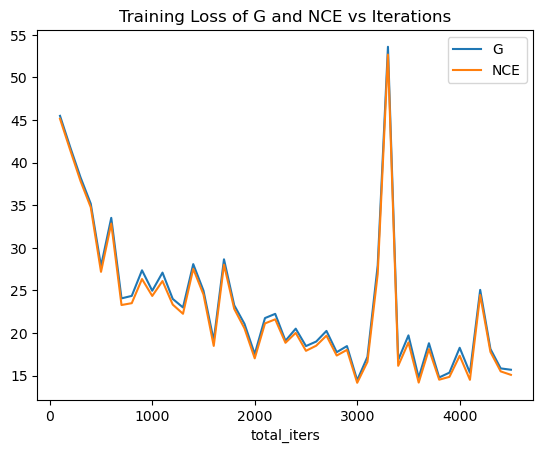

In [50]:
loss_df = pd.read_table('checkpoints/halo2_480/loss_log.txt', skiprows=6, header=None)[0].apply(split_loss_row)
loss_df['prev_epoch'] = loss_df['epoch'].shift()
loss_df['prev_iters'] = loss_df['iters'].shift()
loss_df['this_iter'] = np.where(loss_df['epoch'] == loss_df['prev_epoch'], loss_df['iters'] - loss_df['prev_iters'], loss_df['iters'])
loss_df['total_iters'] = loss_df['this_iter'].cumsum()
# loss_df[['G_GAN', 'D_real', 'D_fake']].plot()
loss_df.set_index('total_iters')[['G', 'NCE']].plot(title='Training Loss of G and NCE vs Iterations')

<AxesSubplot:title={'center':'Training Loss of G and NCE vs Iterations'}, xlabel='total_iters'>

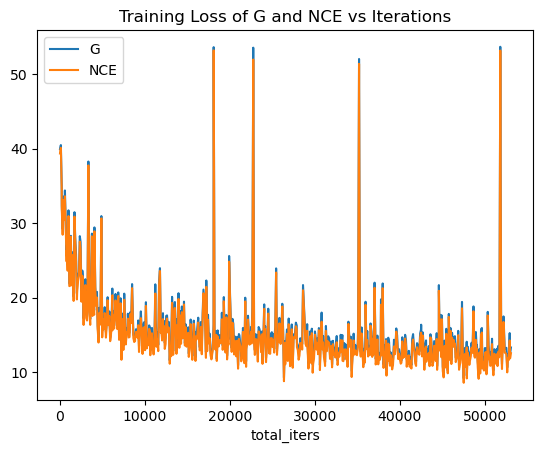

In [51]:
loss_df = pd.read_table('checkpoints/halo2_720/loss_log.txt', skiprows=6, header=None)[0].apply(split_loss_row)
loss_df['prev_epoch'] = loss_df['epoch'].shift()
loss_df['prev_iters'] = loss_df['iters'].shift()
loss_df['this_iter'] = np.where(loss_df['epoch'] == loss_df['prev_epoch'], loss_df['iters'] - loss_df['prev_iters'], loss_df['iters'])
loss_df['total_iters'] = loss_df['this_iter'].cumsum()
# loss_df[['G_GAN', 'D_real', 'D_fake']].plot()
loss_df.set_index('total_iters')[['G', 'NCE']].plot(title='Training Loss of G and NCE vs Iterations')

In [15]:
epochs = sorted([int(x.split('_')[0]) for x in os.listdir('checkpoints/halo2_720') if x.endswith('_net_G.pth') and not x.startswith('latest')])

In [16]:
!python test.py --help

usage: test.py [-h] [--dataroot DATAROOT] [--name NAME]
               [--easy_label EASY_LABEL] [--gpu_ids GPU_IDS]
               [--checkpoints_dir CHECKPOINTS_DIR] [--model MODEL]
               [--input_nc INPUT_NC] [--output_nc OUTPUT_NC] [--ngf NGF]
               [--ndf NDF]
               [--netD {basic,n_layers,pixel,patch,tilestylegan2,stylegan2}]
               [--netG {resnet_9blocks,resnet_6blocks,unet_256,unet_128,stylegan2,smallstylegan2,resnet_cat}]
               [--n_layers_D N_LAYERS_D] [--normG {instance,batch,none}]
               [--normD {instance,batch,none}]
               [--init_type {normal,xavier,kaiming,orthogonal}]
               [--init_gain INIT_GAIN] [--no_dropout [NO_DROPOUT]]
               [--no_antialias] [--no_antialias_up]
               [--dataset_mode DATASET_MODE] [--direction DIRECTION]
               [--serial_batches] [--num_threads NUM_THREADS]
               [--batch_size BATCH_SIZE] [--load_size LOAD_SIZE]
               [--crop_size CR

In [22]:
!python test.py --dataroot ./datasets/halo2_720 --name halo2_720 --CUT_mode FastCUT --phase val \
    --preprocess none --load_size 720 --crop_size 720 \
    --num_threads 8 --epoch 5 --eval --num_test 3

----------------- Options ---------------
                 CUT_mode: FastCUT                       	[default: CUT]
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 480                           	[default: 256]
                 dataroot: ./datasets/halo2_720          	[default: placeholder]
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
               easy_label: experiment_name               
                    epoch: 5                             	[default: latest]
                     eval: True                          	[default: False]
        flip_equivariance: True                          
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: xavier                        


In [31]:
!python -m pytorch_fid results/halo2_720/test_175/images/real_B results/halo2_720/test_175/images/fake_B

/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Downloading: "https://github.com/mseitzer/pytorch-fid/releases/download/fid_weights/pt_inception-2015-12-05-6726825d.pth" to /home/jupyter/.cache/torch/hub/checkpoints/pt_inception-2015-12-05-6726825d.pth
100%|██████████████████████████████████████| 91.2M/91.2M [00:02<00:00, 37.9MB/s]
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main_

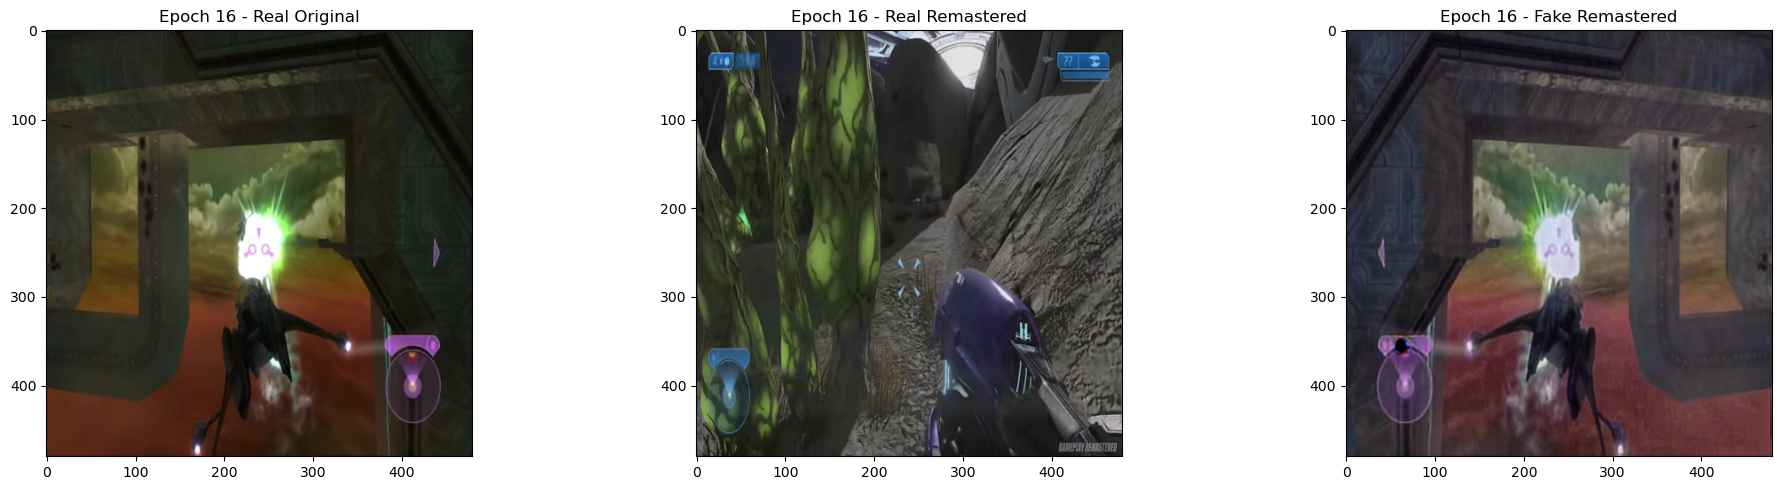

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

ax[0].imshow(plt.imread('checkpoints/halo2_720/web/images/epoch159_real_A.png'))
ax[0].set_title('Epoch 16 - Real Original')
# ax[1].imshow(plt.imread('checkpoints/halo2_720/web/images/epoch159_real_B.png'))
# ax[1].set_title('Epoch 16 - Real Remastered')
ax[2].imshow(plt.imread('checkpoints/halo2_720/web/images/epoch159_fake_B.png'))
ax[2].set_title('Epoch 16 - Fake Remastered')

fig.tight_layout()

In [ ]:
ffmpeg -framerate 25 -i image-%04d.jpg -c:v libx264 -profile:v high -crf 20 -pix_fmt yuv420p output.mp4

In [64]:
os.makedirs('datasets/halo2_720_many/trainA')
os.makedirs('datasets/halo2_720_many/trainB')

In [ ]:
# Paper typo
# https://github.com/taesungp/contrastive-unpaired-translation/issues/5

# Cityscape training params
# https://github.com/taesungp/contrastive-unpaired-translation/issues/16

# > 256 patches * 5 layers = >1000 negatives per image, batch_size=1 means one image
# https://github.com/taesungp/contrastive-unpaired-translation/issues/8

# High resolution --preprocess none; same load_size and crop_size

# 50K pics, 3 epochs
# https://github.com/bendangnuksung/fortnite-pubg

# SinCUT into cyberpunk
# ALGO: Better matching since this is remastering?

# Patch num stays at 256
# https://github.com/taesungp/contrastive-unpaired-translation/issues/26

# How to continue a stopped training: 
# --continue_train --epoch_count 51 --epoch 50 to your training script to load 50_net_*.pth and resume training from epoch 51.
# https://github.com/taesungp/contrastive-unpaired-translation/issues/29

# If CycleGAN fails
# https://github.com/taesungp/contrastive-unpaired-translation/issues/41

# Train speed estimation: (n_epoch * iter_per_epoch * seconds_per_iter)/3600 ===> 200 * 350 * 0.5 / 3600 = 9.7hr
# https://github.com/taesungp/contrastive-unpaired-translation/issues/82

# Image sizing options
# https://github.com/taesungp/contrastive-unpaired-translation/issues/84

# Do not change input image size
# https://github.com/taesungp/contrastive-unpaired-translation/issues/98

# Real_B has no connection to Real_A or Fake_B in the same row / epoch result
# https://github.com/taesungp/contrastive-unpaired-translation/issues/103

# How to view single-image training progression like the orange->apple GIF on github webpage
# https://github.com/taesungp/contrastive-unpaired-translation/issues/120

# Test more samples (to form a video, include all frame pics in the test folder): --num_test 1234
# https://github.com/taesungp/contrastive-unpaired-translation/issues/135